# 1. Preparation before running plans... 

## 1.1. Import Numpy and Matplotlib

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 1.2. Create a RunEngine:

In [11]:
from bluesky import RunEngine
RE = RunEngine({})

## 1.3. Prepare Live Visualization¶

In [12]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()

## 1.4. Prepare Data Storage

In [13]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

##### This example makes a temporary database. Do not use it for important data. The data will become difficult to access once Python exits or the variable db is deleted. Running Broker.named('temp') a second time creates a fresh, separate temporary database.

## 1.5. Add a Progress Bar

In [14]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

# 2. Common Experiments (“Plans”)

## 2.1. Read Some Detectors

In [15]:
from ophyd.sim import det1, det2  # two simulated detectors

In [16]:
from bluesky.plans import count
dets = [det1, det2]   # a list of any number of detectors

RE(count(dets))



Transient Scan ID: 1     Time: 2022-02-10 15:02:13
Persistent Unique Scan ID: '5abc3db9-944d-414f-973c-c34735b5afaa'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 15:02:13.5 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['5abc3db9'] (scan num: 1)





('5abc3db9-944d-414f-973c-c34735b5afaa',)



Transient Scan ID: 2     Time: 2022-02-10 15:03:25
Persistent Unique Scan ID: 'ff3997a2-d1a7-4431-ac30-8708aa5dd16c'
New stream: 'primary'


<IPython.core.display.Javascript object>


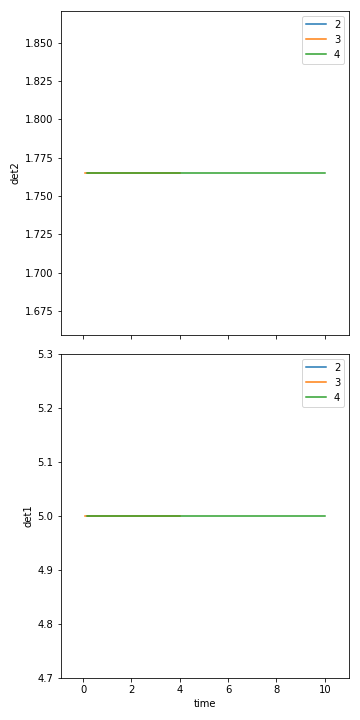

+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 15:03:25.7 |      1.765 |      5.000 |
|         2 | 15:03:25.7 |      1.765 |      5.000 |
|         3 | 15:03:25.7 |      1.765 |      5.000 |
|         4 | 15:03:25.7 |      1.765 |      5.000 |
|         5 | 15:03:25.7 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['ff3997a2'] (scan num: 2)





('ff3997a2-d1a7-4431-ac30-8708aa5dd16c',)

In [17]:
# five consecutive readings
RE(count(dets, num=5))

In [18]:
# five sequential readings separated by a 1-second delay
RE(count(dets, num=5, delay=1))



Transient Scan ID: 3     Time: 2022-02-10 15:03:41
Persistent Unique Scan ID: 'a3e441e4-fbdc-4302-a601-007ebac61b6a'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 15:03:41.0 |      1.765 |      5.000 |
|         2 | 15:03:42.0 |      1.765 |      5.000 |
|         3 | 15:03:43.0 |      1.765 |      5.000 |
|         4 | 15:03:44.0 |      1.765 |      5.000 |
|         5 | 15:03:45.0 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['a3e441e4'] (scan num: 3)





('a3e441e4-fbdc-4302-a601-007ebac61b6a',)

In [19]:
# a variable delay
RE(count(dets, num=5, delay=[1, 2, 3, 4]))



Transient Scan ID: 4     Time: 2022-02-10 15:03:58
Persistent Unique Scan ID: '2b2d70bc-0fdc-4fa0-ac22-5bfb7cf4bae2'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 15:03:58.5 |      1.765 |      5.000 |
|         2 | 15:03:59.3 |      1.765 |      5.000 |
|         3 | 15:04:01.3 |      1.765 |      5.000 |
|         4 | 15:04:04.3 |      1.765 |      5.000 |
|         5 | 15:04:08.3 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['2b2d70bc'] (scan num: 4)





('2b2d70bc-0fdc-4fa0-ac22-5bfb7cf4bae2',)

## 2.2. Scan



Transient Scan ID: 5     Time: 2022-02-10 15:05:08
Persistent Unique Scan ID: '88d3c11d-1d5f-41f3-90af-20dba3799b3c'
New stream: 'primary'


<IPython.core.display.Javascript object>


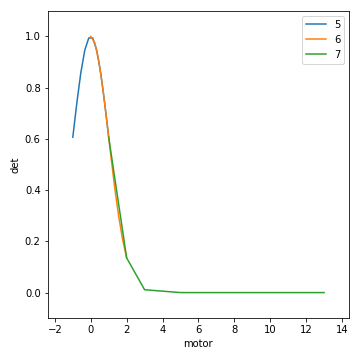

+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 15:05:08.6 |     -1.000 |      0.607 |
|         2 | 15:05:08.6 |     -0.778 |      0.739 |
|         3 | 15:05:08.7 |     -0.556 |      0.857 |
|         4 | 15:05:08.7 |     -0.333 |      0.946 |
|         5 | 15:05:08.7 |     -0.111 |      0.994 |
|         6 | 15:05:08.7 |      0.111 |      0.994 |
|         7 | 15:05:08.7 |      0.333 |      0.946 |
|         8 | 15:05:08.7 |      0.556 |      0.857 |
|         9 | 15:05:08.7 |      0.778 |      0.739 |
|        10 | 15:05:08.7 |      1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['88d3c11d'] (scan num: 5)





('88d3c11d-1d5f-41f3-90af-20dba3799b3c',)

In [20]:
from ophyd.sim import det, motor
from bluesky.plans import scan
dets = [det]   # just one in this case, but it could be more than one

RE(scan(dets, motor, -1, 1, 10))

In [21]:
# Relative scan to the current position
from bluesky.plans import rel_scan

RE(rel_scan(dets, motor, -1, 1, 10))



Transient Scan ID: 6     Time: 2022-02-10 15:07:55
Persistent Unique Scan ID: '2598bdb7-045f-4643-ae07-251c4069f27d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 15:07:55.9 |      0.000 |      1.000 |
|         2 | 15:07:55.9 |      0.222 |      0.976 |
|         3 | 15:07:55.9 |      0.444 |      0.906 |
|         4 | 15:07:55.9 |      0.667 |      0.801 |
|         5 | 15:07:55.9 |      0.889 |      0.674 |
|         6 | 15:07:56.0 |      1.111 |      0.539 |
|         7 | 15:07:56.0 |      1.333 |      0.411 |
|         8 | 15:07:56.0 |      1.556 |      0.298 |
|         9 | 15:07:56.0 |      1.778 |      0.206 |
|        10 | 15:07:56.0 |      2.000 |      0.135 |
+-----------+------------+------------+------------+
generator rel_scan ['2598bdb7'] (scan num: 6)





('2598bdb7-045f-4643-ae07-251c4069f27d',)



Transient Scan ID: 8     Time: 2022-02-10 15:09:49
Persistent Unique Scan ID: '81739b19-210c-4d2d-8f1d-8273a0f505ec'
New stream: 'primary'


<IPython.core.display.Javascript object>


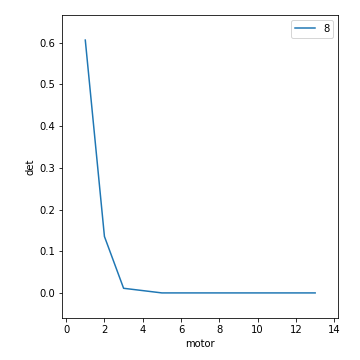

+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 15:09:49.4 |          1 |      0.607 |
|         2 | 15:09:49.4 |          1 |      0.607 |
|         3 | 15:09:49.4 |          2 |      0.135 |
|         4 | 15:09:49.4 |          3 |      0.011 |
|         5 | 15:09:49.4 |          5 |      0.000 |
|         6 | 15:09:49.4 |          8 |      0.000 |
|         7 | 15:09:49.4 |         13 |      0.000 |
+-----------+------------+------------+------------+
generator list_scan ['81739b19'] (scan num: 8)





('81739b19-210c-4d2d-8f1d-8273a0f505ec',)

In [23]:
# Use list_scan() to scan points with some arbitrary spacing.
from bluesky.plans import list_scan

points = [1, 1, 2, 3, 5, 8, 13]

RE(list_scan(dets, motor, points))



Transient Scan ID: 9     Time: 2022-02-10 15:19:26
Persistent Unique Scan ID: 'fc5c3315-57ad-4fed-ac25-f02162777261'
New stream: 'primary'


<IPython.core.display.Javascript object>


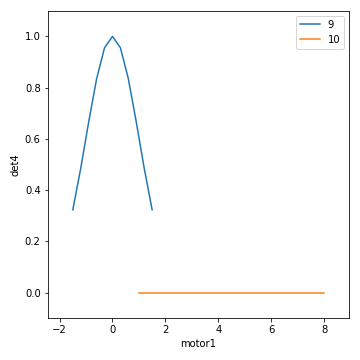

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |       det4 |
+-----------+------------+------------+------------+------------+
|         1 | 15:19:26.2 |     -1.500 |     -0.100 |      0.323 |
|         2 | 15:19:26.2 |     -1.200 |     -0.080 |      0.485 |
|         3 | 15:19:26.2 |     -0.900 |     -0.060 |      0.666 |
|         4 | 15:19:26.2 |     -0.600 |     -0.040 |      0.835 |
|         5 | 15:19:26.3 |     -0.300 |     -0.020 |      0.956 |
|         6 | 15:19:26.3 |      0.000 |      0.000 |      1.000 |
|         7 | 15:19:26.3 |      0.300 |      0.020 |      0.956 |
|         8 | 15:19:26.3 |      0.600 |      0.040 |      0.835 |
|         9 | 15:19:26.3 |      0.900 |      0.060 |      0.666 |
|        10 | 15:19:26.3 |      1.200 |      0.080 |      0.485 |
|        11 | 15:19:26.3 |      1.500 |      0.100 |      0.323 |
+-----------+------------+------------+------------+------------+
generator 

('fc5c3315-57ad-4fed-ac25-f02162777261',)

In [24]:
from ophyd.sim import det4, motor1, motor2
dets = [det4]
RE(scan(dets,
        motor1, -1.5, 1.5,  # scan motor1 from -1.5 to 1.5
        motor2, -0.1, 0.1,  # ...while scanning motor2 from -0.1 to 0.1
        11))  # ...both in 11 steps

In [25]:
# Scan motor1 and motor2 jointly through a 5-point trajectory.
RE(list_scan(dets, motor1, [1, 1, 3, 5, 8], motor2, [25, 16, 9, 4, 1]))



Transient Scan ID: 10     Time: 2022-02-10 15:20:06
Persistent Unique Scan ID: '7f65d5f3-232c-4c06-b34e-86436f080881'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |       det4 |
+-----------+------------+------------+------------+------------+
|         1 | 15:20:06.2 |          1 |         25 |      0.000 |
|         2 | 15:20:06.2 |          1 |         16 |      0.000 |
|         3 | 15:20:06.2 |          3 |          9 |      0.000 |
|         4 | 15:20:06.2 |          5 |          4 |      0.000 |
|         5 | 15:20:06.2 |          8 |          1 |      0.000 |
+-----------+------------+------------+------------+------------+
generator list_scan ['7f65d5f3'] (scan num: 10)





('7f65d5f3-232c-4c06-b34e-86436f080881',)

In [29]:
from ophyd.sim import motor3
from bluesky.plans import grid_scan
RE(grid_scan(dets,
             motor1, -1.5, 1.5, 3,  # scan motor1 from -1.5 to 1.5 in 3 steps
             motor2, -0.1, 0.1, 5,  # scan motor2 from -0.1 to 0.1 in 5 steps
             motor3, 10, -10, 5,
             snake_axes=True))  # scan motor3 from 10 to -10 in 5 steps



Transient Scan ID: 13     Time: 2022-02-10 15:28:44
Persistent Unique Scan ID: 'fd200b4b-913e-4a2b-b085-c45701146f0b'
New stream: 'primary'





('fd200b4b-913e-4a2b-b085-c45701146f0b',)



Transient Scan ID: 14     Time: 2022-02-10 15:28:48
Persistent Unique Scan ID: 'f9345754-fe7c-408d-9829-4bdc03f5aa92'
New stream: 'primary'


<IPython.core.display.Javascript object>


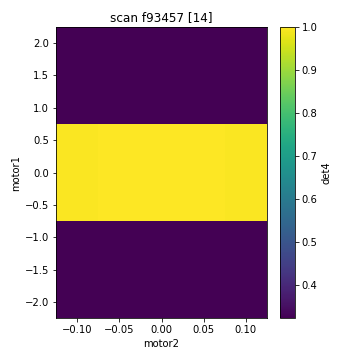

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |       det4 |
+-----------+------------+------------+------------+------------+
|         1 | 15:28:48.4 |     -1.500 |     -0.100 |      0.323 |
|         2 | 15:28:48.5 |     -1.500 |     -0.050 |      0.324 |
|         3 | 15:28:48.5 |     -1.500 |      0.000 |      0.325 |
|         4 | 15:28:48.5 |     -1.500 |      0.050 |      0.324 |
|         5 | 15:28:48.5 |     -1.500 |      0.100 |      0.323 |
|         6 | 15:28:48.5 |      0.000 |      0.100 |      0.995 |
|         7 | 15:28:48.5 |      0.000 |      0.050 |      0.999 |
|         8 | 15:28:48.5 |      0.000 |      0.000 |      1.000 |
|         9 | 15:28:48.5 |      0.000 |     -0.050 |      0.999 |
|        10 | 15:28:48.6 |      0.000 |     -0.100 |      0.995 |
|        11 | 15:28:48.6 |      1.500 |     -0.100 |      0.323 |
|        12 | 15:28:48.6 |      1.500 |     -0.050 |      0.324 |
|        1

('f9345754-fe7c-408d-9829-4bdc03f5aa92',)

In [30]:
RE(grid_scan(dets,
             motor1, -1.5, 1.5, 3,  # scan motor1 from -1.5 to 1.5 in 3 steps
             motor2, -0.1, 0.1, 5,  # scan motor2 from -0.1 to 0.1 in 5 steps
             snake_axes=True))  # scan motor3 from 10 to -10 in 5 steps



Transient Scan ID: 16     Time: 2022-02-10 15:30:24
Persistent Unique Scan ID: '8fea64db-6065-42d6-b2aa-e9e468832c52'
New stream: 'primary'


<IPython.core.display.Javascript object>


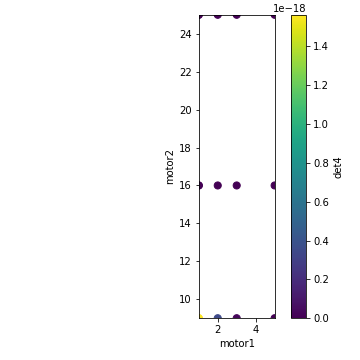

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |       det4 |
+-----------+------------+------------+------------+------------+
|         1 | 15:30:24.8 |          1 |         25 |      0.000 |
|         2 | 15:30:24.8 |          1 |         16 |      0.000 |
|         3 | 15:30:24.8 |          1 |          9 |      0.000 |
|         4 | 15:30:24.8 |          1 |         25 |      0.000 |
|         5 | 15:30:24.9 |          1 |         16 |      0.000 |
|         6 | 15:30:24.9 |          1 |          9 |      0.000 |
|         7 | 15:30:24.9 |          2 |         25 |      0.000 |
|         8 | 15:30:24.9 |          2 |         16 |      0.000 |
|         9 | 15:30:24.9 |          2 |          9 |      0.000 |
|        10 | 15:30:24.9 |          3 |         25 |      0.000 |
|        11 | 15:30:24.9 |          3 |         16 |      0.000 |
|        12 | 15:30:24.9 |          3 |          9 |      0.000 |
|        1

In [32]:
from bluesky.plans import list_grid_scan

uid, = RE(list_grid_scan(dets,
                  motor1, [1, 1, 2, 3, 5],
                  motor2, [25, 16, 9]))

# 3. Access Saved Data

In [33]:
uid

'8fea64db-6065-42d6-b2aa-e9e468832c52'

In [34]:
header = db[uid]

In [35]:
header.start

{'uid': '8fea64db-6065-42d6-b2aa-e9e468832c52',
 'time': 1644525024.666666,
 'versions': {'ophyd': '1.6.3', 'bluesky': '1.8.2'},
 'scan_id': 16,
 'plan_type': 'generator',
 'plan_name': 'list_grid_scan',
 'detectors': ['det4'],
 'motors': ['motor1', 'motor2'],
 'num_points': 15,
 'num_intervals': 14,
 'plan_args': {'detectors': ["Syn2DGauss(prefix='', name='det4', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
  'args': ["SynAxis(prefix='', name='motor1', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   [1, 1, 2, 3, 5],
   "SynAxis(prefix='', name='motor2', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   [25, 16, 9]],
  'per_step': 'None'},
 'hints': {'dimensions': [[['motor1'], 'primary'], [['motor2'], 'primary']]},
 'shape': [5, 3],
 'extents': [[1, 5], [9, 25]],
 'snake_axes': False,
 'plan_pattern': 'outer_list_product',
 'plan_pattern_args': {'args': ["SynAxis(prefix='', name='motor1', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   [1, 1, 2, 3, 5],
   "SynAxis(prefix='', name='motor2', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
   [25, 16, 9]],
  'snake_axes': False},
 'plan_pattern_module': 'bluesky.plan_patterns'}

In [36]:
header.table()

,time,det4,motor2,motor2_setpoint,motor1,motor1_setpoint
seq_num,,,,,,
1,2022-02-10 20:30:24.847712040,1.163663e-136,25,25,1,1
2,2022-02-10 20:30:24.872010946,1.560124e-56,16,16,1,1
3,2022-02-10 20:30:24.885309935,1.562882e-18,9,9,1,1
4,2022-02-10 20:30:24.895251036,1.163663e-136,25,25,1,1
5,2022-02-10 20:30:24.901067019,1.560124e-56,16,16,1,1
6,2022-02-10 20:30:24.906888008,1.562882e-18,9,9,1,1
7,2022-02-10 20:30:24.914155006,2.596483e-137,25,25,2,2
8,2022-02-10 20:30:24.924479961,3.481107e-57,16,16,2,2
9,2022-02-10 20:30:24.930055857,3.487262e-19,9,9,2,2


# 4. Simple Customization

In [37]:
def coarse_and_ine(detectors, motor, start, stop):
    yield from scan(detectors, motor, start, stop, 10)
    yield from scan(detectors, motor, start, stop, 100)

In [49]:
from bluesky.plan_stubs import mv

def move_then_count(detectors, motors, positions):
    for m in motors:
        for p in positions:
            yield from mv(m, p)
            yield from count(detectors)

In [39]:
def multi_step_scan(detectors, motors, start, stop, steps, step_min=1, step_max=10):
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i)



Transient Scan ID: 17     Time: 2022-02-10 16:00:44
Persistent Unique Scan ID: '8628c118-31d0-4b7c-bf40-27ef6c848bee'
New stream: 'primary'


<IPython.core.display.Javascript object>


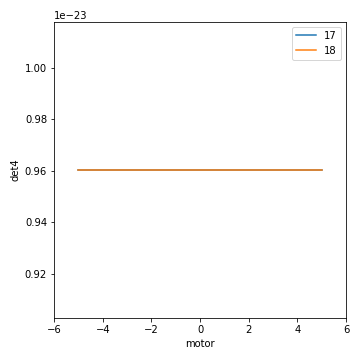

+-----------+------------+------------+------------+
|   seq_num |       time |      motor |       det4 |
+-----------+------------+------------+------------+
|         1 | 16:00:44.6 |     -5.000 |      0.000 |
|         2 | 16:00:44.7 |     -3.889 |      0.000 |
|         3 | 16:00:44.7 |     -2.778 |      0.000 |
|         4 | 16:00:44.7 |     -1.667 |      0.000 |
|         5 | 16:00:44.7 |     -0.556 |      0.000 |
|         6 | 16:00:44.7 |      0.556 |      0.000 |
|         7 | 16:00:44.7 |      1.667 |      0.000 |
|         8 | 16:00:44.7 |      2.778 |      0.000 |
|         9 | 16:00:44.7 |      3.889 |      0.000 |
|        10 | 16:00:44.8 |      5.000 |      0.000 |
+-----------+------------+------------+------------+
generator scan ['8628c118'] (scan num: 17)





Transient Scan ID: 18     Time: 2022-02-10 16:00:44
Persistent Unique Scan ID: 'a739b6eb-5017-4cfd-acac-709b6159b54e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |    

('8628c118-31d0-4b7c-bf40-27ef6c848bee',
 'a739b6eb-5017-4cfd-acac-709b6159b54e')

In [40]:
RE(coarse_and_ine(dets, motor, -5, 5))

In [50]:
dets = [det1, det2]
mots = [motor1, motor2]
pos = np.arange(0,10,2)

In [51]:
RE(move_then_count(dets, mots, pos))



Transient Scan ID: 21     Time: 2022-02-10 16:05:00
Persistent Unique Scan ID: 'cd6bc7d4-6585-408f-95f7-8ee4159754ae'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 16:05:00.4 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['cd6bc7d4'] (scan num: 21)





Transient Scan ID: 22     Time: 2022-02-10 16:05:00
Persistent Unique Scan ID: 'd6728ebd-de2c-4382-aecd-2a207d6dca9e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 16:05:00.6 |      1.765 |      0.002 |
+-----------+------------+------------+------------+
generator count ['d6728ebd'] (scan num: 22)





Transient Scan ID: 23     Time: 2022-02-10 16:05:00
Persistent Unique Scan ID: 'e9adebb6-f

('cd6bc7d4-6585-408f-95f7-8ee4159754ae',
 'd6728ebd-de2c-4382-aecd-2a207d6dca9e',
 'e9adebb6-f055-48fa-a376-8343f970c77d',
 'c17c986d-5f99-4066-a790-b2d21aa01931',
 'c35443a5-b80b-4ee3-9513-a8cc9ca2ca88',
 '7e36eec5-cad5-4021-a17d-8f427339164b',
 '327c41fd-6f75-4df1-bbdf-158066c3a4fb',
 '1b1849c9-67d1-4a6b-b12b-67b52bc8ca04',
 'f6f7bb9a-380e-4b54-94d8-554cbd4a29be',
 '6527a27f-ee4e-4ef8-8d16-7b7020f80e1b')



Transient Scan ID: 31     Time: 2022-02-10 16:06:54
Persistent Unique Scan ID: 'b1a7b400-7ae5-4b11-aa48-f85fbb7010b9'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:06:54.6 |    -10.000 |      0.004 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['b1a7b400'] (scan num: 31)





Transient Scan ID: 32     Time: 2022-02-10 16:06:54
Persistent Unique Scan ID: 'a71d249d-6dff-4662-8036-275f13f113cb'
New stream: 'primary'


<IPython.core.display.Javascript object>


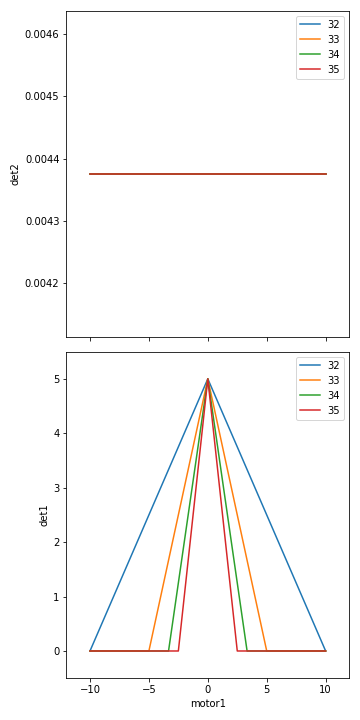

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:06:55.0 |    -10.000 |      0.004 |      0.000 |
|         2 | 16:06:55.0 |      0.000 |      0.004 |      5.000 |
|         3 | 16:06:55.0 |     10.000 |      0.004 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['a71d249d'] (scan num: 32)





Transient Scan ID: 33     Time: 2022-02-10 16:06:55
Persistent Unique Scan ID: 'ec8b0554-d731-4e0e-a543-c0239785e332'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:06:55.3 |    -10.000 |      0.004 |      0.000 |
|         2 | 16:06:55.3 |     -5.000 |      0.004 |      0.000 |
|         3 | 16:06:

<IPython.core.display.Javascript object>


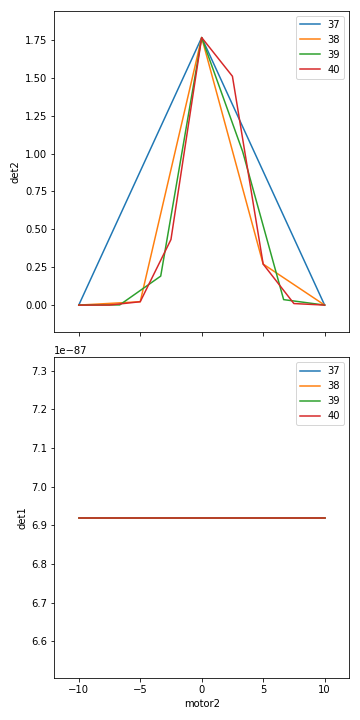

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:06:56.3 |    -10.000 |      0.000 |      0.000 |
|         2 | 16:06:56.3 |      0.000 |      1.765 |      0.000 |
|         3 | 16:06:56.3 |     10.000 |      0.000 |      0.000 |
+-----------+------------+------------+------------+------------+
generator scan ['74210672'] (scan num: 37)





Transient Scan ID: 38     Time: 2022-02-10 16:06:56
Persistent Unique Scan ID: 'bdecacd3-d5b5-43ac-9706-aea9404a26fc'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:06:56.5 |    -10.000 |      0.000 |      0.000 |
|         2 | 16:06:56.5 |     -5.000 |      0.022 |      0.000 |
|         3 | 16:06:

('b1a7b400-7ae5-4b11-aa48-f85fbb7010b9',
 'a71d249d-6dff-4662-8036-275f13f113cb',
 'ec8b0554-d731-4e0e-a543-c0239785e332',
 '3472b8b7-cbc1-4dac-b257-9a038fb9551b',
 '31333acc-f67f-4db1-8d5e-7e3e8e19c5d1',
 '63e4f163-ac2e-4c28-88ce-07fd3ed0d128',
 '74210672-0ad3-48a8-9533-62dececaaf27',
 'bdecacd3-d5b5-43ac-9706-aea9404a26fc',
 'da81b738-538d-4d4a-b9cf-79675b1dc604',
 'fbd44d0d-1040-41e9-ba85-c6026aa9264b')

In [52]:
RE(multi_step_scan(dets, mots, -10, 10, 2))

In [55]:
header = db[-1]
header